In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import poisson 

Primeira visualizaçao da base, observando um resumo e titulos de colunas.

In [2]:
df = pd.read_csv('DelayedFlights.zip')
print(df.columns)
print("____________________________________________________________________________________")
df.dtypes

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')
____________________________________________________________________________________


Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Tradução

| Nome da Coluna        | Descrição                                       |
|-----------------------|-------------------------------------------------|
| Year                  | Ano                                             |
| Month                 | Mês                                             |
| DayofMonth            | Dia do mês                                      |
| DayOfWeek             | Dia da semana                                   |
| DepTime               | Hora de partida                                 |
| CRSDepTime            | Hora de partida programada                      |
| ArrTime               | Hora de chegada                                 |
| CRSArrTime            | Hora de chegada programada                      |
| UniqueCarrier         | Companhia aérea                                 |
| FlightNum             | Número do voo                                   |
| TailNum               | Número da cauda da aeronave (N. de serie)       |
| ActualElapsedTime     | Tempo de voo                                    |
| CRSElapsedTime        | Tempo de voo programado                         |
| AirTime               | Tempo no ar                                     |
| ArrDelay              | Atraso na chegada                               |
| DepDelay              | Atraso na partida                               |
| Origin                | Aeroporto de origem                             |
| Dest                  | Aeroporto de destino                            |
| Distance              | Distância do voo                                |
| TaxiIn                | Tempo de táxi na chegada                        |
| TaxiOut               | Tempo de táxi na partida                        |
| Cancelled             | Cancelado (indicador binário)                   |
| CancellationCode      | Código de cancelamento                          |
| Diverted              | Desviado (indicador binário)                    |
| CarrierDelay          | Atraso devido à companhia aérea                 |
| WeatherDelay          | Atraso devido ao clima                          |
| NASDelay              | Atraso no sistema nacional de aviação           |
| SecurityDelay         | Atraso devido a razões de segurança             |
| LateAircraftDelay     | Atraso devido a aeronave atrasada               |


In [3]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Análise descritiva por completo da base Variáveis discretas

In [4]:
variaveis_discretas = ['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
                        'FlightNum', 'Cancelled', 'Diverted',]

df[variaveis_discretas].describe()

,Year,Month,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Cancelled,Diverted
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,2008.0,6.111106e+00,3.984827e+00,1.467473e+03,1.634225e+03,2.184263e+03,3.268348e-04,4.003598e-03
std,0.0,3.482546e+00,1.995966e+00,4.247668e+02,4.646347e+02,1.944702e+03,1.807562e-02,6.314722e-02
min,2008.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,6.100000e+02,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,4.000000e+00,1.510000e+03,1.705000e+03,1.543000e+03,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,6.000000e+00,1.815000e+03,2.014000e+03,3.422000e+03,0.000000e+00,0.000000e+00
max,2008.0,1.200000e+01,7.000000e+00,2.359000e+03,2.400000e+03,9.742000e+03,1.000000e+00,1.000000e+00


In [5]:
# Contagem de voos por ano, mês e dia da semana
contagem_por_ano = df['Year'].value_counts()
contagem_por_mes = df['Month'].value_counts()
contagem_por_dia_da_semana = df['DayOfWeek'].value_counts()

print("\nContagem de Voos por Ano:")
print(contagem_por_ano)

print("\nContagem de Voos por Mês:")
print(contagem_por_mes)

print("\nContagem de Voos por Dia da Semana:")
print(contagem_por_dia_da_semana)


Contagem de Voos por Ano:
Year
2008    1936758
Name: count, dtype: int64

Contagem de Voos por Mês:
Month
12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: count, dtype: int64

Contagem de Voos por Dia da Semana:
DayOfWeek
5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: count, dtype: int64


In [6]:
# Contagem de voos cancelados e desviados
voos_cancelados = df['Cancelled'].value_counts()
voos_desviados = df['Diverted'].value_counts()

print("\nContagem de Voos Cancelados:")
print(voos_cancelados)

print("\nContagem de Voos Desviados:")
print(voos_desviados)


Contagem de Voos Cancelados:
Cancelled
0    1936125
1        633
Name: count, dtype: int64

Contagem de Voos Desviados:
Diverted
0    1929004
1       7754
Name: count, dtype: int64


In [7]:
# Companhias aéreas mais frequentes
# Variável categórica
top_companhias = df['UniqueCarrier'].value_counts().head(10)

print("\nContagem de Voos por Companhia Aérea:")
print(top_companhias)


Contagem de Voos por Companhia Aérea:
UniqueCarrier
WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
Name: count, dtype: int64


In [8]:
# Aeroportos mais utilizados como origem e destino
# Variável categórica
top_aeroportos_origem = df['Origin'].value_counts().head(10)
top_aeroportos_destino = df['Dest'].value_counts().head(10)

print("\nAeroportos Mais Utilizados como Origem:")
print(top_aeroportos_origem)

print("\nAeroportos Mais Utilizados como Destino:")
print(top_aeroportos_destino)


Aeroportos Mais Utilizados como Origem:
Origin
ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
IAH     56847
PHX     55720
LAS     53710
EWR     52925
DTW     43923
Name: count, dtype: int64

Aeroportos Mais Utilizados como Destino:
Dest
ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
EWR     55861
LAS     48858
PHX     47836
SFO     46876
IAH     43905
Name: count, dtype: int64


Análise Descritiva Variáveis Contínuas

In [9]:
variaveis_continuas = ['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
                       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'WeatherDelay',
                       'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

df[variaveis_continuas].describe()

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1.929648e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,1.518534e+03,1.610141e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,4.504853e+02,5.481781e+02,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.203000e+03,1.316000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.545000e+03,1.715000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,1.900000e+03,2.030000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2.400000e+03,2.400000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


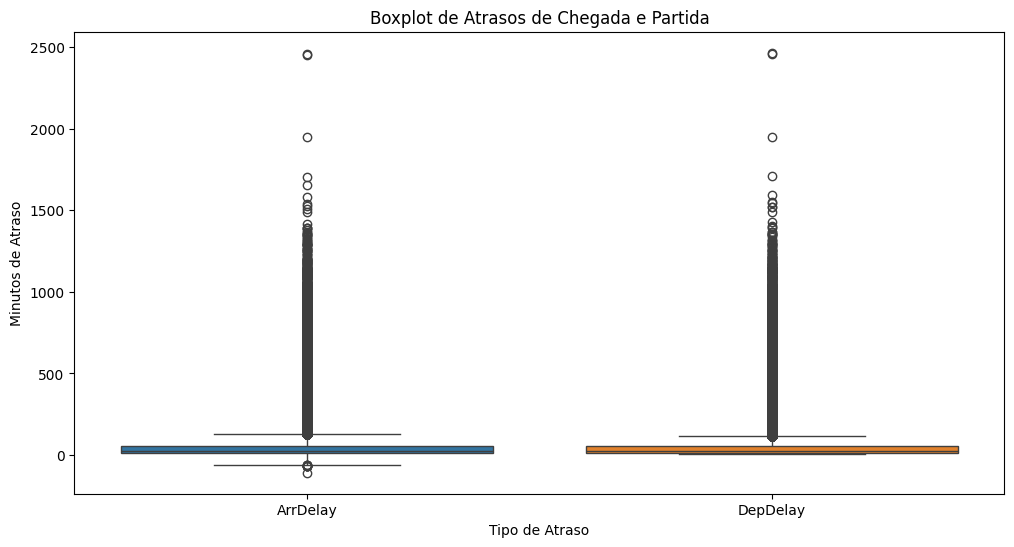

In [10]:
# Boxplots para atrasos de chegada e partida
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['ArrDelay', 'DepDelay']])
plt.title('Boxplot de Atrasos de Chegada e Partida')
plt.xlabel('Tipo de Atraso')
plt.ylabel('Minutos de Atraso')
plt.show()

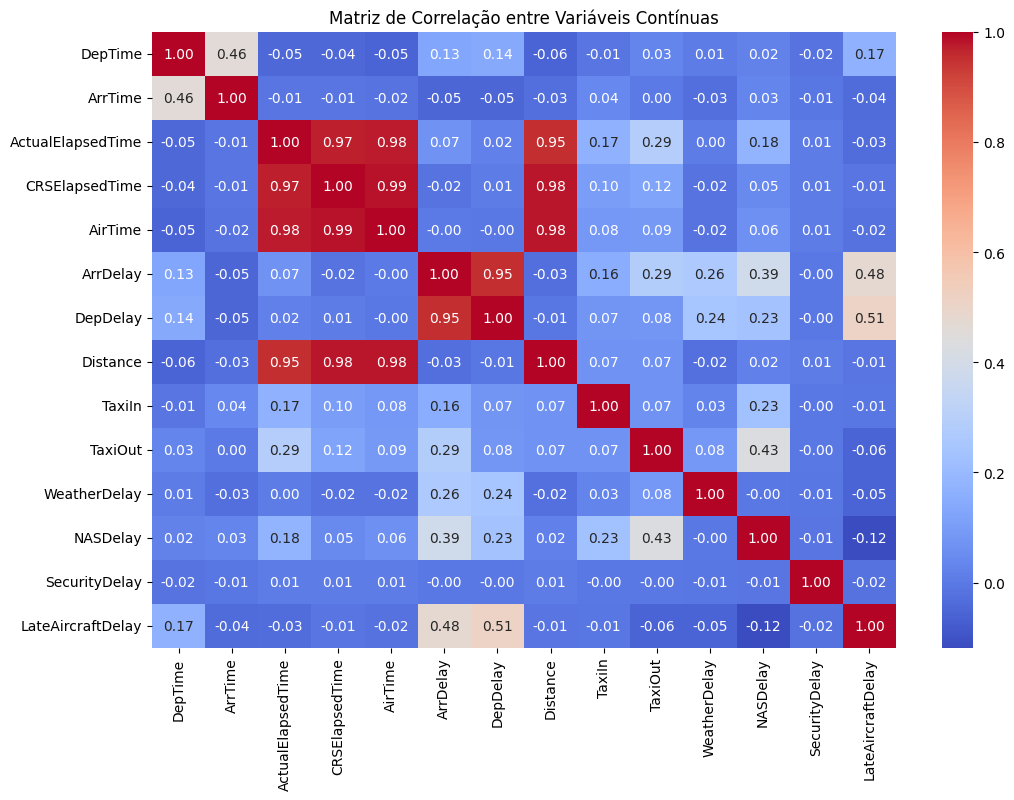

In [11]:
# Correlação entre variáveis contínuas
correlacao = df[variaveis_continuas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Contínuas')
plt.show()

Visualizar atrasos por Companhia aerea, origem, destino.
Também queremos observar quais companhias mais tem voos cancelados.

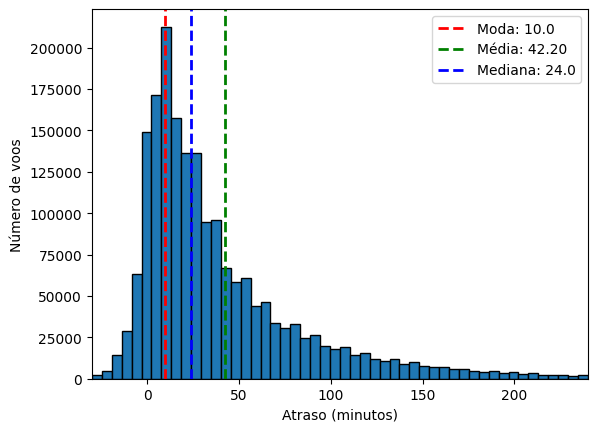

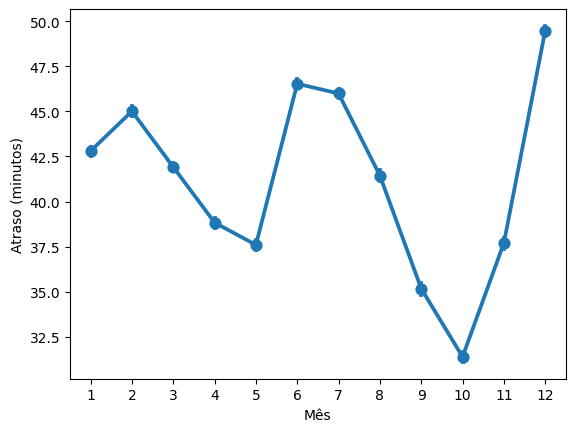

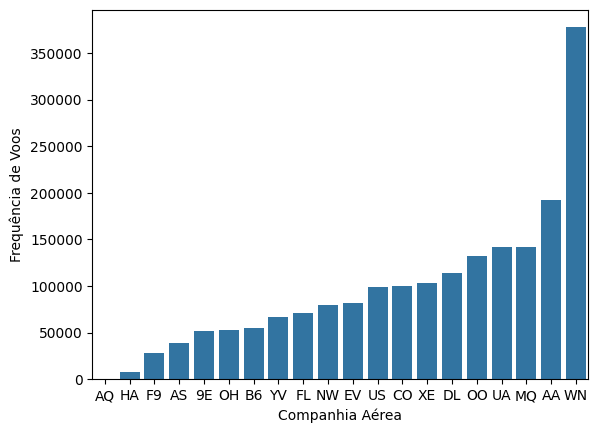

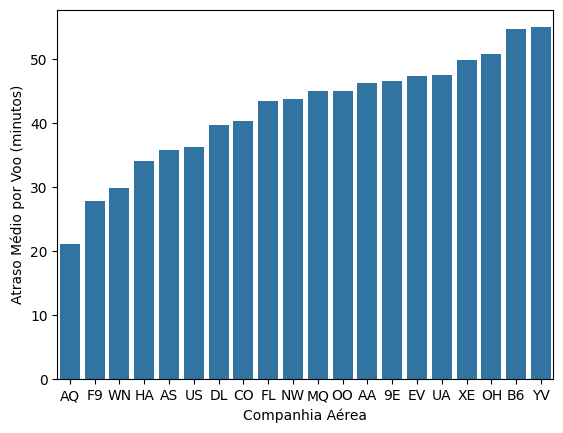

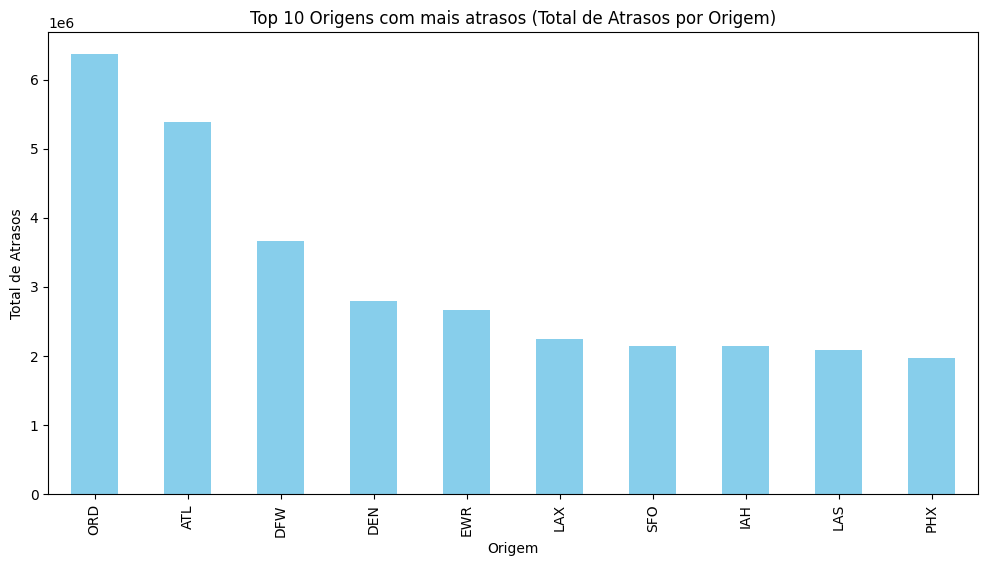

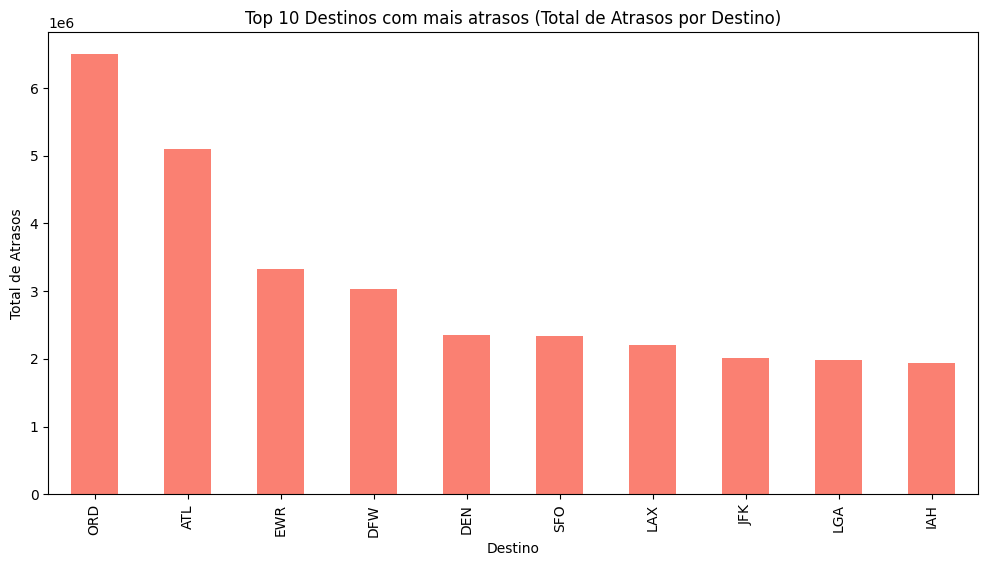

In [12]:
df_atrasos = df[['ArrDelay','DepDelay', 'DayOfWeek', 'Month', 'UniqueCarrier', 'Origin', 'Dest', 'CarrierDelay', 'Cancelled']]

# Moda, média e mediana
moda = df_atrasos["ArrDelay"].mode()[0]
media = df_atrasos["ArrDelay"].mean()
mediana = df_atrasos["ArrDelay"].median()

# Maximo e minimo exibidos
limite_inferior = -30
limite_superior = 240

# Filtrar os dados dentro dos limites desejados
dados_filtrados = df_atrasos[(df_atrasos['ArrDelay'] >= limite_inferior) & (df_atrasos['ArrDelay'] <= limite_superior)]

# Histograma de atrasos
plt.hist(dados_filtrados["ArrDelay"], bins=50, edgecolor='black')
plt.xlabel("Atraso (minutos)")
plt.ylabel("Número de voos")

plt.axvline(moda, color='red', linestyle='dashed', linewidth=2, label=f'Moda: {moda}')
plt.axvline(media, color='green', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
plt.axvline(mediana, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana}')

# Valores mínimo e máximo no eixo x
plt.xlim(limite_inferior, limite_superior)

plt.legend()

plt.show()

# Grafico de atraso por mês
sns.pointplot(x="Month", y="ArrDelay", data=df_atrasos)
plt.xlabel("Mês")
plt.ylabel("Atraso (minutos)")
plt.show()

# Grafico de atraso por companhia aérea
df_atrasos.groupby("UniqueCarrier")["ArrDelay"].mean().sort_values(ascending=True).head(10)

sns.countplot(x='UniqueCarrier', data=df, order=df['UniqueCarrier'].value_counts().sort_values().index)
plt.xlabel('Companhia Aérea')
plt.ylabel('Frequência de Voos')
plt.show()

# Cálculo do atraso acumulado e médio por companhia aérea
df_atrasos_cia = df.groupby('UniqueCarrier')['ArrDelay'].sum()
df_atrasos_cia_media = df_atrasos_cia / df.groupby('UniqueCarrier').size()

# Ordenação por atraso médio crescente
df_atrasos_cia_media = df_atrasos_cia_media.sort_values(ascending=True)

# Criação do gráfico de barras
sns.barplot(x=df_atrasos_cia_media.index, y=df_atrasos_cia_media)

# Adição de rótulos aos eixos
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio por Voo (minutos)')

# Exibição do gráfico
plt.show()

total_origin_delay = df_atrasos.groupby('Origin')['DepDelay'].sum().sort_values(ascending=False)

# Total de atrasos por Destino (Dest)
total_dest_delay = df_atrasos.groupby('Dest')['ArrDelay'].sum().sort_values(ascending=False)

# Gráfico para Origem (Total de atrasos por Origem)
plt.figure(figsize=(12, 6))
total_origin_delay.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Origens com mais atrasos (Total de Atrasos por Origem)')
plt.xlabel('Origem')
plt.ylabel('Total de Atrasos')
plt.show()

# Gráfico para Destino (Total de atrasos por Destino)
plt.figure(figsize=(12, 6))
total_dest_delay.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Destinos com mais atrasos (Total de Atrasos por Destino)')
plt.xlabel('Destino')
plt.ylabel('Total de Atrasos')
plt.show()

In [13]:
df_voos = df[['ArrDelay', 'DepDelay', 'DayOfWeek', 'Month', 'UniqueCarrier', 'Origin', 'Dest', 'CarrierDelay', 'Cancelled']]

# Filtrar os dados para incluir apenas atrasos (ArrDelay > 0)
df_atrasos = df_voos[df_voos['ArrDelay'] > 0]

# Calcular o total de voos e o total de atrasos para cada companhia aérea
total_voos_por_cia = df_voos['UniqueCarrier'].value_counts()
total_atrasos_por_cia = df_atrasos.groupby('UniqueCarrier')['ArrDelay'].count()

# Calcular o total de cancelamentos para cada companhia aérea
total_cancelamentos_por_cia = df_voos[df_voos['Cancelled'] == 1].groupby('UniqueCarrier')['Cancelled'].count()

# Calcular a taxa de atraso por 100 voos
taxa_atraso_por_100_voos = (total_atrasos_por_cia / total_voos_por_cia) * 100

# Calcular a taxa de cancelamentos por 100 voos
taxa_cancelamentos_por_100_voos = (total_cancelamentos_por_cia / total_voos_por_cia) * 100

# Criar um novo DataFrame com UniqueCarrier, total de voos, total de atrasos, taxa de atraso por 100 voos, 
# total de cancelamentos e taxa de cancelamentos por 100 voos
df_taxa_atraso = pd.DataFrame({
    'UniqueCarrier': total_voos_por_cia.index,
    'TotalVoos': total_voos_por_cia.values,
    'TotalAtrasos': total_atrasos_por_cia.reindex(total_voos_por_cia.index, fill_value=0).values,
    'TaxaAtrasoPor100Voos': taxa_atraso_por_100_voos.reindex(total_voos_por_cia.index, fill_value=0).values,
    'TotalCancelamentos': total_cancelamentos_por_cia.reindex(total_voos_por_cia.index, fill_value=0).values,
    'TaxaCancelamentosPor100Voos': taxa_cancelamentos_por_100_voos.reindex(total_voos_por_cia.index, fill_value=0).values
})

# Exibir o DataFrame resultante
print(df_taxa_atraso)

   UniqueCarrier  TotalVoos  TotalAtrasos  TaxaAtrasoPor100Voos  \
0             WN     377602        324717             85.994513   
1             AA     191865        172197             89.749042   
2             MQ     141920        130647             92.056793   
3             UA     141426        123989             87.670584   
4             OO     132433        121942             92.078258   
5             DL     114238        100923             88.344509   
6             XE     103663         94313             90.980388   
7             CO     100195         83646             83.483208   
8             US      98425         83262             84.594361   
9             EV      81877         75170             91.808444   
10            NW      79108         72395             91.514133   
11            FL      71284         65008             91.195780   
12            YV      67063         63289             94.372456   
13            B6      55315         48177             87.09572

   UniqueCarrier  Moda      Média  Mediana  Prob_atrasar_ate 30 mins
0             WN   6.0  30.087884     17.0                 65.293004
1             XE  10.0  50.181217     30.0                  1.118496
2             YV  14.0  55.287049     34.0                  0.133102
3             OH  15.0  51.016968     33.0                  0.584726
4             OO  10.0  45.370587     27.0                  2.769854
5             UA   7.0  47.784399     29.0                  1.764458
6             US   6.0  36.445019     21.0                 28.249242
7             DL  10.0  39.881507     23.0                 16.636897
8             EV  10.0  47.554255     28.0                  2.166441
9             F9  10.0  27.938953     17.0                 78.768752
10            FL  12.0  43.683157     25.0                  6.131300
11            HA   8.0  34.209449     18.0                 72.132533
12            MQ   7.0  45.295058     28.0                  4.432344
13            NW  14.0  43.911000 

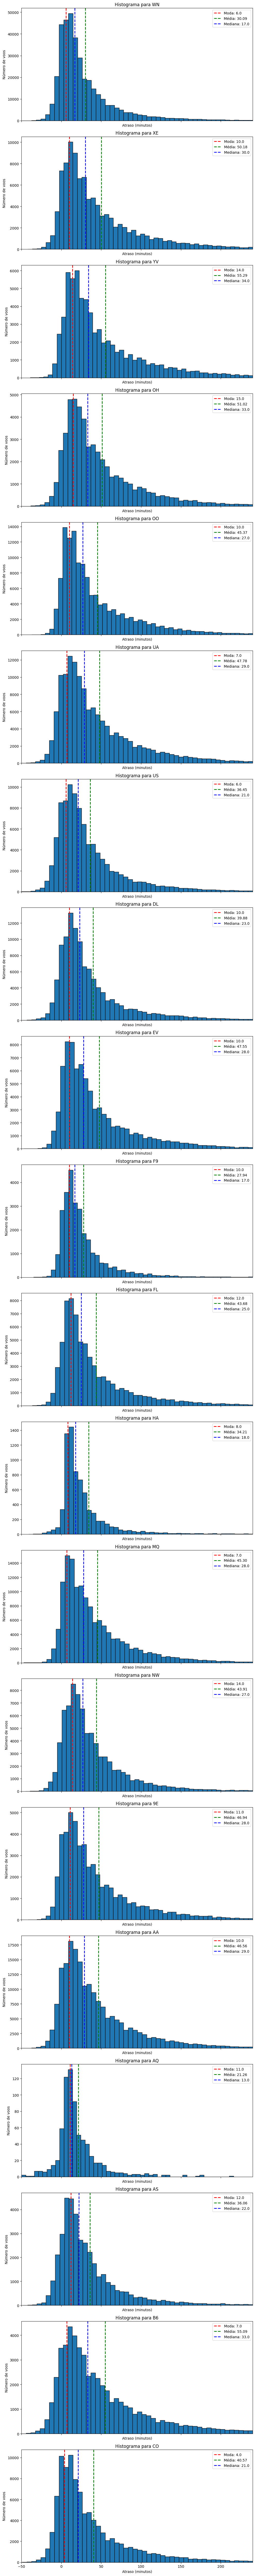

In [14]:
# maximo e o minimo plotado
limite_inferior = -50
limite_superior = 240

# Filtrar os dados para maximo e minimo
dados_filtrados = df_voos[(df_voos['ArrDelay'] >= limite_inferior) & (df_voos['ArrDelay'] <= limite_superior)]

# Valores únicos da coluna 'UniqueCarrier'
carriers = df_voos['UniqueCarrier'].unique()

# DataFrame para armazenar as estatísticas
estatisticas_df = pd.DataFrame(columns=['UniqueCarrier', 'Moda', 'Média', 'Mediana'])

num_subplots = len(carriers)

fig, axs = plt.subplots(num_subplots, 1, figsize=(10, 5 * num_subplots), sharex=True)

# DataFrames temporários
dfs = []

# Loop gráfico para cada 'UniqueCarrier'
for i, carrier in enumerate(carriers):
    subset = dados_filtrados[dados_filtrados['UniqueCarrier'] == carrier]
    
    axs[i].hist(subset['ArrDelay'], bins=50, edgecolor='black')
    axs[i].set_title(f'Histograma para {carrier}')
    axs[i].set_xlabel("Atraso (minutos)")
    axs[i].set_ylabel("Número de voos")
    
    # moda, média e mediana 
    moda = df_voos[df_voos['UniqueCarrier'] == carrier]['ArrDelay'].mode()[0]
    media = df_voos[df_voos['UniqueCarrier'] == carrier]['ArrDelay'].mean()
    mediana = df_voos[df_voos['UniqueCarrier'] == carrier]['ArrDelay'].median()
    
    axs[i].axvline(moda, color='red', linestyle='dashed', linewidth=2, label=f'Moda: {moda}')
    axs[i].axvline(media, color='green', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
    axs[i].axvline(mediana, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana}')
    
    axs[i].legend()
    
    # probabilidade Poisson
    atraso_ate = 30
    lambda_param = subset['ArrDelay'].mean()  # Pode ajustar o parâmetro conforme desejado
    prob_nao_atrasar = poisson.cdf(atraso_ate, lambda_param) * 100  # Probabilidade em percentual
    texto_atraso = "Prob_atrasar_ate " + str(atraso_ate) + " mins"

    # Append de DataFrames temporários
    df_temp = pd.DataFrame({'UniqueCarrier': [carrier], 'Moda': [moda], 'Média': [media], 'Mediana': [mediana], texto_atraso: [prob_nao_atrasar]})
    dfs.append(df_temp)
    

estatisticas_df = pd.concat(dfs, ignore_index=True)

plt.xlim(limite_inferior, limite_superior)

print(estatisticas_df)

plt.tight_layout()
plt.show()

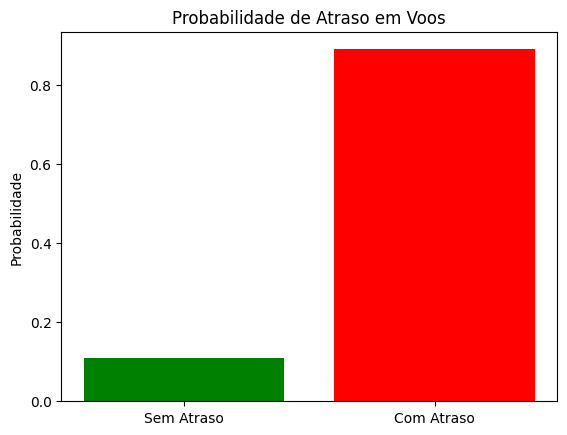

Número de Voos Sem Atraso: 213343
Número de Voos Com Atraso: 1723415


In [17]:
#Distribuição de Bernoulli para modelar atrasos em voos.

from scipy.stats import bernoulli

# Criando uma variável binária indicando se houve atraso (1) ou não (0)
df['AtrasoBinario'] = (df['ArrDelay'] > 0).astype(int)

prob_atraso = df['AtrasoBinario'].mean()

distribuicao_bernoulli = bernoulli(prob_atraso)

plt.bar(['Sem Atraso', 'Com Atraso'], [1 - prob_atraso, prob_atraso], color=['green', 'red'])
plt.title('Probabilidade de Atraso em Voos')
plt.ylabel('Probabilidade')
plt.show()

contagem_atraso = df['AtrasoBinario'].value_counts()

print("Número de Voos Sem Atraso:", contagem_atraso[0])
print("Número de Voos Com Atraso:", contagem_atraso[1])

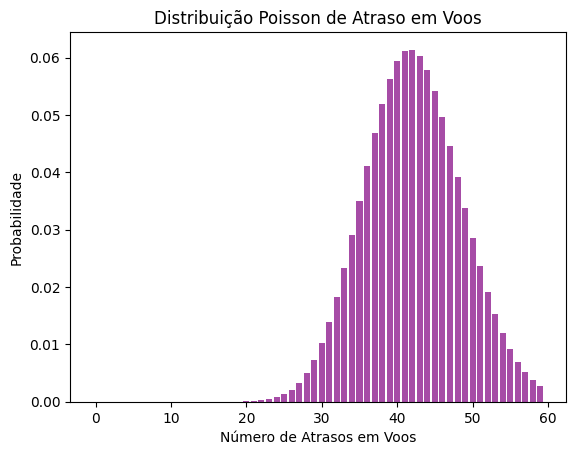

In [11]:
from scipy.stats import poisson

# Criando uma variável binária indicando se houve atraso (1) ou não (0)
df['AtrasoBinario'] = (df['ArrDelay'] > 0).astype(int)

# Calculando a média dos atrasos para ser o lambda
media_atraso = df['ArrDelay'].mean()

distribuicao_poisson = poisson(mu=media_atraso)

x = np.arange(0, 60)  
plt.bar(x, distribuicao_poisson.pmf(x), color='purple', alpha=0.7)
plt.title('Distribuição Poisson de Atraso em Voos')
plt.xlabel('Número de Atrasos em Voos')
plt.ylabel('Probabilidade')
plt.show()